In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

## <center> Деревья решений

**Идея деревьев решений:**

Здесь можно вспомнить игру "Акинатор". Человек загадывает знаменитость, а отгадывающий (Акинатор) пытается отгадать, задавая только вопросы, на которые можно ответить "Да" или "Нет" (опустим варианты "не знаю" и "не могу сказать").

**Какой вопрос отгадывающий задаст первым делом?** Конечно, такой, который сильнее всего уменьшит количество оставшихся вариантов. К примеру, вопрос "Это Анджелина Джоли?" в случае отрицательного ответа оставит более 7 миллиардов вариантов для дальнейшего перебора, а вот вопрос "Это женщина?" отсечет уже около половины знаменитостей. 

То есть, признак "пол" намного лучше разделяет выборку людей, чем признак "это Анджелина Джоли", "национальность-испанец" или "любит футбол". Это интуитивно соответствует понятию прироста информации, основанного на ***энтропии***.

Ниже пример дерева решений для принятия решения о том, страховать клиента или нет.

<img src="https://github.com/MalikaL17/course_materials/blob/main/img/decision_tree.PNG?raw=true">


**Деревья решений** - иерархические древовидные структуры, состоящие из ***решающих правил*** вида «Если ..., то ...».  Правила автоматически генерируются в процессе обучения на обучающем множестве. Этот класс алгоритмов относится к обучению с учителем. 

Деревья решений могут применятся как для задачи классификации, так и для задачи регрессии. Если целевая переменная дискретная (метка класса), то модель называют ***деревом классификации***, а если непрерывная, то ***деревом регрессии***.

### Преимущества деревьев решений:
    
- Легко интерпретировать результаты и понять, как модель "думает", т.к. логика работы модели основанна на правилах. К тому же можно визуализировать построенное дерево
- Не требуют нормализации или стандартизации данных
- Не чувствительны к выбросам
- Возможность генерации правил в областях, где эксперту трудно формализовать свои знания
- Более высокая точность предсказаний из-за возмжности построить нелинейное разделение

### Деревья - "жадные"

Алгоритмы построения деревьев решений относят к категории так называемых **жадных** алгоритмов. Жадными называются алгоритмы, которые допускают, что локально-оптимальные решения на каждом шаге (разбиения в узлах), приводят к оптимальному итоговому решению. 

В случае деревьев решений это означает, что если один раз был выбран атрибут, и по нему было произведено разбиение на подмножества, то алгоритм **не может вернуться назад** и выбрать другой атрибут, который дал бы лучшее итоговое разбиение. Поэтому на этапе построения нельзя сказать обеспечит ли выбранный атрибут, в конечном итоге, оптимальное разбиение.

## <center> Деревья классификации

### Как дерево формирует решающее правило?

Главная идея - из всего набора обучающих данных выбрать такие ***признак*** и ***отсечку***, разбитие по которым приведет к тому, что в разбитых подмножествах окажутса объекты одного класса или большинство из объектов будут принадлежать к одному классу. 

То есть, разбиение должно привести к тому, что полученные подмножества становятся более упорядоченными.

**Популярные критерии разбиения:**

**1) Энтропия Шенона** - выбираем признаки так, чтобы после каждого разбиения уменьшалась энтропия. Энтропия варьируется от 0 до 1, чем она меньше, тем лучше.

$$S = -\sum_{i=1}^Np_{i}log_2p_i$$

где 
- pi – вероятности нахождения системы в i-ом состоянии

**2) Неопределенность Джинни** 
$$G = 1 - \sum_{i=1}^cp_i^2$$
где
- pi - доля наблюдений класса **с** в узле t
При условии, что в одном листе дерева мы собрали объекты одного класса

Рассмотрим пример рассчета энтропии. Допустим, мы хотим построить модель, которая по координате будет определять цвет шарика.

<img src="https://github.com/MalikaL17/course_materials/blob/main/img/entropy.png?raw=true">

### Проблема переобучения

Если не ограничивать рост классификационного дерева, то разбиение на узлы будет продолжаться, пока каждый лист не станет "чистым" (т.е. будет содержать объекты только одного класса), что может перевести к переобучению и потере обобщающей способности модели. Избежать этого можно следующим образом:

1. Ограничить глубину дерева - задаем максимальное число разбиений в ветвях, при долстижении которого алгоритм остановится
2. Задать минимальное количество объектов в листе
3. Остановка при достижении заданного критерия - например, останавливаем ветвление при достижении нужной точности модели

Настроить это можно с помощью специальных **гиперпараметров** модели. 

**Гиперпараметры** - свойства, "настройки" модели, которые мы задаем еще **до** обучения модели, в отличиее от обычных параметров модели, значения которых мы получаем уже **после** того, как обучили модель. Например, коэффициенты линейной регрессии, которые мы получили после ее обучения методом наименьших квадратов - это параметры модели. 

Рассмотрим на построение дерева примере.

In [ ]:
# первый класс
np.seed = 7
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

In [ ]:
train_data

array([[-1.92605854,  1.92011617],
       [ 1.45650936,  0.36261796],
       [-0.4755514 ,  1.17322181],
       [ 0.91209168, -0.60022621],
       [ 0.55953812, -1.0600126 ],
       [ 0.19774812,  1.25394702],
       [ 1.04950604, -0.25695122],
       [ 1.30009174,  0.7219512 ],
       [ 0.47524905,  0.19115753],
       [ 0.04325584,  0.86975118],
       [-1.0879309 ,  0.8362749 ],
       [ 0.84827329, -1.40566624],
       [-1.40841767, -0.39186802],
       [ 1.34757902, -1.88478684],
       [-0.15819535,  0.52330847],
       [ 0.02517996,  1.24708186],
       [ 0.93104047, -0.35378897],
       [-0.04176698, -0.71276403],
       [ 0.31189103, -0.72670999],
       [ 0.9223473 , -0.07807207],
       [-0.48547985, -0.8955115 ],
       [-1.05030399, -1.58160434],
       [ 2.01260611, -0.67792341],
       [-0.82812697, -0.59977645],
       [-2.86009596, -0.01846946],
       [-0.844619  , -0.02507966],
       [-2.2841283 ,  0.64511904],
       [ 0.33923979, -1.16139701],
       [ 1.59061267,

In [ ]:
train_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

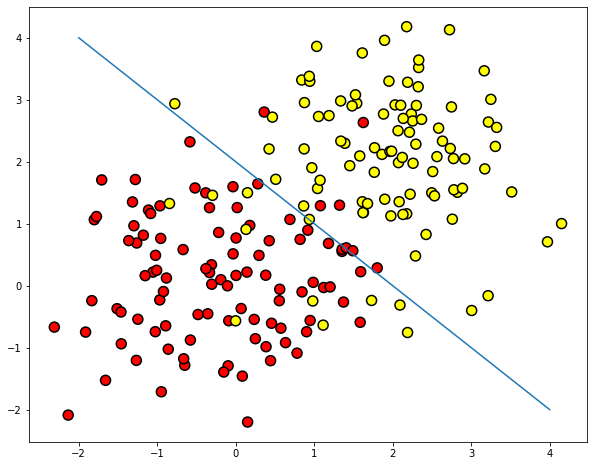

In [ ]:
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

Строим классификационное дерево и задаем ему гиперпараметры.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3, random_state=17)

# обучаем дерево
clf_tree.fit(train_data, train_labels)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3,
                       random_state=17)

Визуализируем, как дерево разбивает ("нарезает") прострнаство с целью выделения классов

<ipython-input-6-b8ba6eb3c4c3>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')


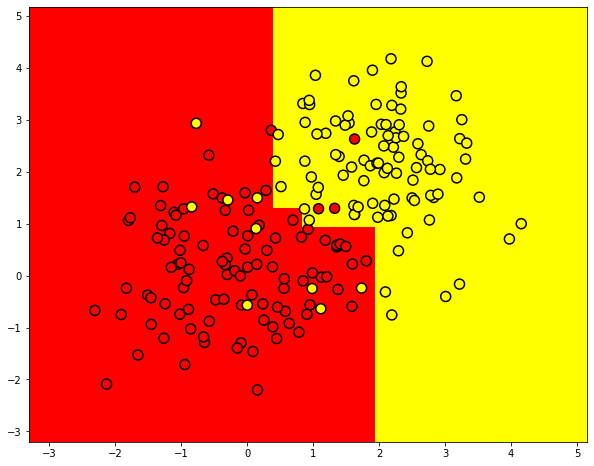

In [ ]:
# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);

**Визуализируем полученное дерево**

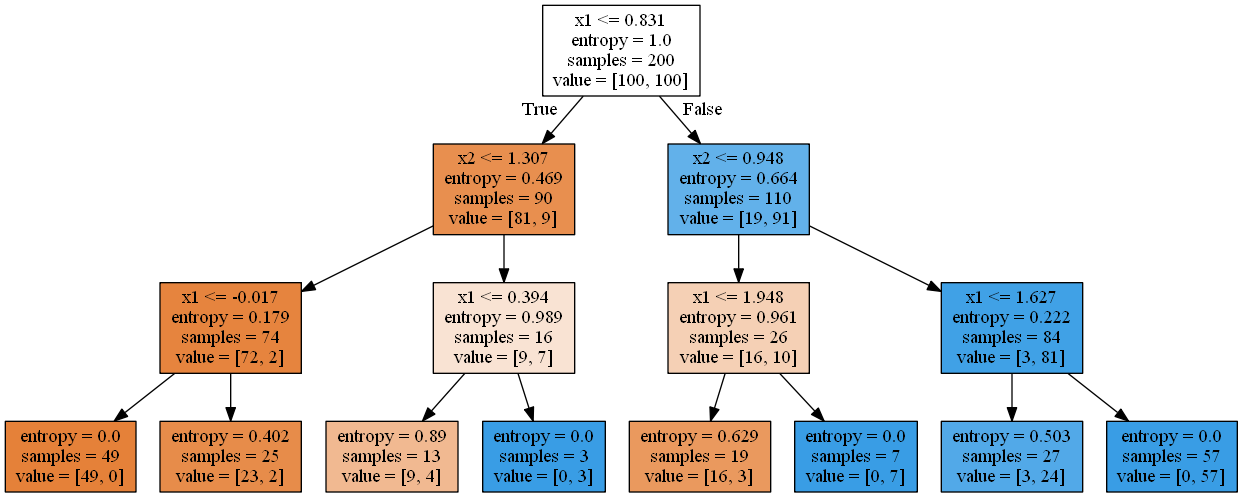

In [ ]:
# используем .dot формат для визуализации дерева
from sklearn.tree import export_graphviz
export_graphviz(
    clf_tree,
    feature_names=['x1', 'x2'],
    out_file='small_tree.dot',
    filled=True)

# для этого понадобится библиотека pydot (pip install pydot)

import pydot
(graph,) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')

from IPython.core.display import Image, display
display(Image('small_tree.png', unconfined=True))

In [ ]:
!pip install pydotplus

Processing c:\users\malika\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36\pydotplus-2.0.2-py3-none-any.whl


**Пример с классификацией телефнов**

Построим неглубокое дерево (max_depth=3), чтобы посмотреть, по каким призакам и отсечкам будет построено дерево для решения задачи классификации смартфонов на 4 ценовых даипазона.

In [4]:
phones = pd.read_csv('PhoneClassification.csv')
phones.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [11]:
features = phones[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']] 
y = phones['price_range']

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5, random_state=17)

# обучаем дерево
clf_tree.fit(features, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=17)

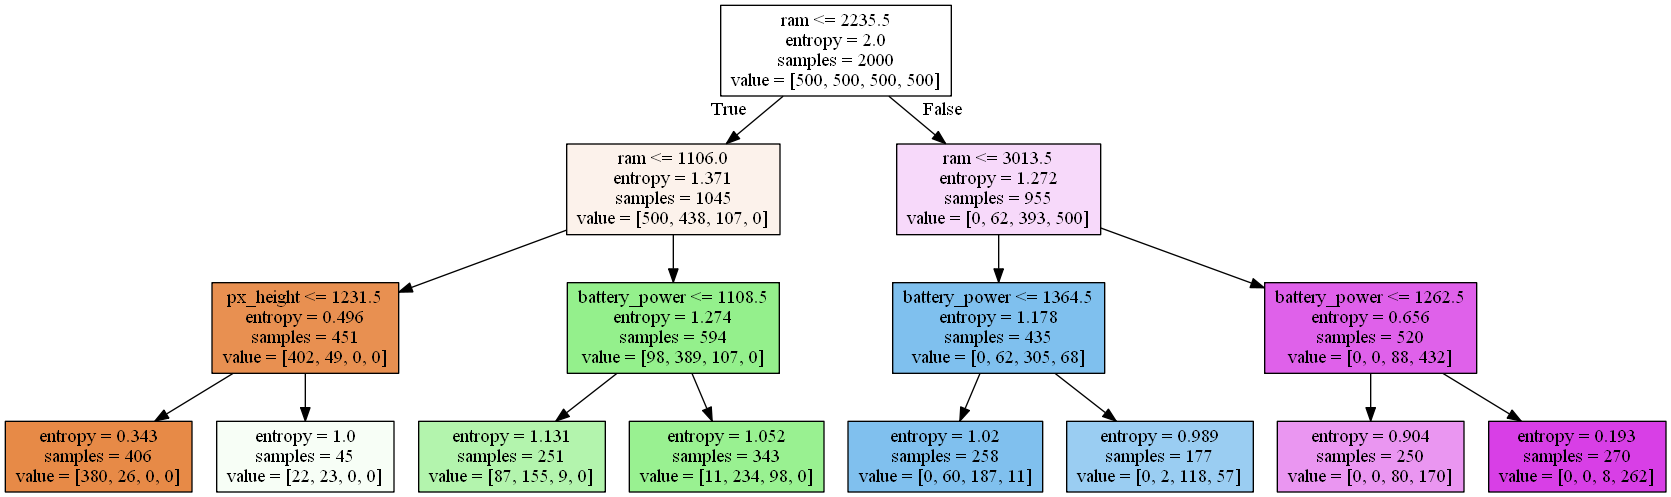

In [12]:
# используем .dot формат для визуализации дерева
from sklearn.tree import export_graphviz
export_graphviz(
    clf_tree,
    feature_names=features.columns,
    out_file='phones_tree.dot',
    filled=True)

# для этого понадобится библиотека pydot (pip install pydot)

import pydot
(graph,) = pydot.graph_from_dot_file('phones_tree.dot')
graph.write_png('phones_tree.png')

from IPython.core.display import Image, display
display(Image('phones_tree.png', unconfined=True))

В деревьях можно просмотреть важность признака с помощью метода ***feature_importances_***. В примере ниже видим значимость только одно значение, равное единицы. 

В нашем примере мы специально ограничили глубину дерева, чтобы его было удобно визуально анализировать. Поэтому, в построении дерева участвовало мало признаков, всего три: **ram**, **battery_power** и **px_height**. Поэтому важность признаков посчиталась только по этим трем признакам, для всех остальных она равна нулю по причине того, что они не участвовали в построении дерева. Если мы увеличим глубину дерева, в него может попасть больше признаков.

In [14]:
features.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [13]:
clf_tree.feature_importances_

array([0.10160086, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01599625, 0.        , 0.8824029 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

## <center> Деревья регрессии

### Главная идея
В задачи регрессии переменная представляет собой не дискретную метку класса, а непрерывное значение, его мы и пытаемся предсказать моделью. Принцип построения регрессионного дерева такой же, как и дерева классификации - все также нужно выбрать наилучшие для разбиения **признак** и **отсечку**, однако меняется критерий разбиения. Вместо энтропии и неопределенности Джини теперь может использоваться, например, **MSE** (среднеквадратическая ошибка) или **MAE**(средняя абсолютная ошибка).

Прогнозом дерева регрессии будет **среднее значение** в листе. Поэтому, дерево регрессии, в отличии от дерева классификации не нужно сильно ограничивать по глубине, из-за этого прогнозные значения слишком сгладятся



Рассмотрим работу дерева регрессии на примере.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

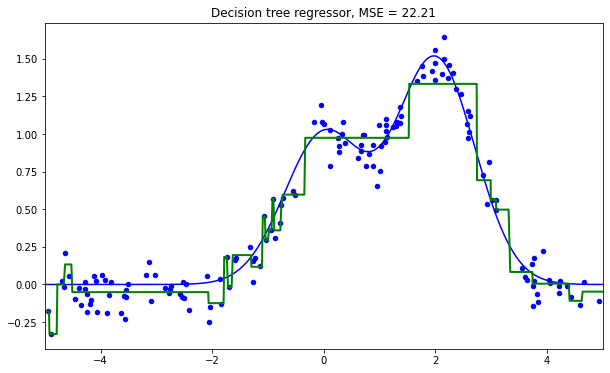

In [ ]:
reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

Посмотрим, как будет менятся качество модели при измении, скажем, глубины дерева.
Из графика ниже видно, что после определенного момента увеличение глубины не приводит к повышению точности.

Оптимальная глубина дерева: 6. Достигается MSE: 0.017447792197290087
Wall time: 526 ms


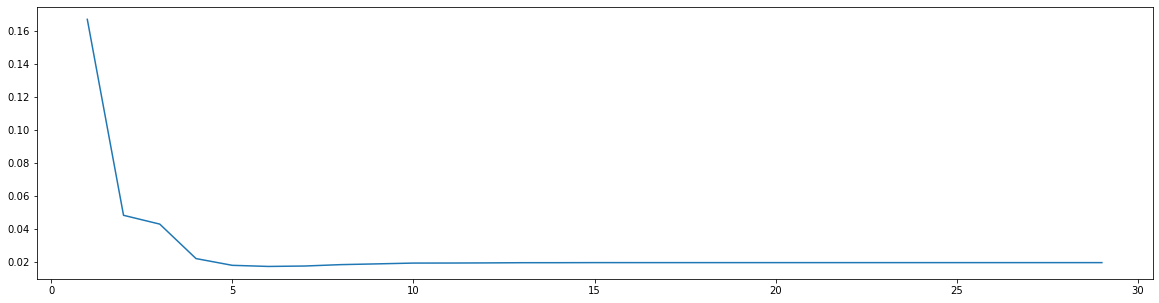

In [ ]:
%%time
plt.figure(figsize=(20, 5))
depth, score = [], []
for max_depth in range(1,30):
    depth.append(max_depth)
    dt_r = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
    dt_r.fit(X_train, y_train)
    pred = dt_r.predict(X_test)
    score.append(mean_squared_error(pred, y_test))

print(f"Оптимальная глубина дерева: {score.index(min(score)) + 1}. Достигается MSE: {score[score.index(min(score))]}")
plt.plot(depth, score);